In [ ]:
import sys
import os
import pandas as pd
import numpy as np


diretorio_pai = os.path.dirname(os.getcwd())
dados = "Base de Dados"
diretorio_base_dados = os.path.join(diretorio_pai,dados)
diretorio_dados_olist = "Olist Database"
diretorio_base_olist = os.path.join(diretorio_base_dados,diretorio_dados_olist)

arquivos = [os.path.join(diretorio_base_olist,arquivo) for arquivo in os.listdir(diretorio_base_olist) if os.path.isfile(os.path.join(diretorio_base_olist, arquivo))]




In [ ]:
customers = pd.read_csv('d:\\Faculdade\\Integração de Dados\\Trabalho de Integração de Dados\\Base de Dados\\Olist Database\\olist_customers_dataset.csv',sep=",")
geolocalizacao = pd.read_csv('d:\\Faculdade\\Integração de Dados\\Trabalho de Integração de Dados\\Base de Dados\\Olist Database\\olist_geolocation_dataset.csv',sep=",")
pedidos = pd.read_csv('d:\\Faculdade\\Integração de Dados\\Trabalho de Integração de Dados\\Base de Dados\\Olist Database\\olist_orders_dataset.csv',sep=",")
itens_pedidos = pd.read_csv('d:\\Faculdade\\Integração de Dados\\Trabalho de Integração de Dados\\Base de Dados\\Olist Database\\olist_order_items_dataset.csv',sep=",")
pagamento_pedidos = pd.read_csv('d:\\Faculdade\\Integração de Dados\\Trabalho de Integração de Dados\\Base de Dados\\Olist Database\\olist_order_payments_dataset.csv',sep=",")
review_pedidos = pd.read_csv('d:\\Faculdade\\Integração de Dados\\Trabalho de Integração de Dados\\Base de Dados\\Olist Database\\olist_order_reviews_dataset.csv',sep=",")
produtos = pd.read_csv('d:\\Faculdade\\Integração de Dados\\Trabalho de Integração de Dados\\Base de Dados\\Olist Database\\olist_products_dataset.csv',sep=",")
vendedores = pd.read_csv('d:\\Faculdade\\Integração de Dados\\Trabalho de Integração de Dados\\Base de Dados\\Olist Database\\olist_sellers_dataset.csv',sep=",")
categoria_produtos = pd.read_csv('d:\\Faculdade\\Integração de Dados\\Trabalho de Integração de Dados\\Base de Dados\\Olist Database\\product_category_name_translation.csv',sep=",")

## Função para salvar métricas criadas como csv

In [44]:
dir_atual = os.getcwd()
dir_raiz = os.path.dirname(dir_atual)
caminho_metricas_dw = "Metricas"
caminho_metricas_dw = os.path.join(dir_raiz,caminho_metricas_dw) 
def salva_metrica(df:pd.DataFrame,nomeArquivoComExtensao:str):
    caminho_arquivo = os.path.join(caminho_metricas_dw,nomeArquivoComExtensao)
    df.to_csv(caminho_arquivo)

Trabalhar na tabela **pedidos** para avaliação do tempo de recibo da ordem de compra e entrega do pedido é possível detalhar toda a cadeia de transporte. Ordem de Compra > Aprovação > Transportadora > Cliente e Estimativa

In [3]:
colunas_para_datetime = {
                     'order_purchase_timestamp':"Horario Compra",
                     'order_approved_at':"Horario Aprovacao",
                     'order_delivered_carrier_date':"Horario Transportadora",
                     'order_delivered_customer_date':"Horario Cliente",
                     'order_estimated_delivery_date':"Horario Estimado"
                     }


#Modificando para datetime para possibilitar os calculos de diferença de data
for coluna in colunas_para_datetime.keys():
    pedidos[coluna] = pd.to_datetime(pedidos[coluna], format='%Y-%m-%d %H:%M:%S')
#Renomeando os nomes das colunas
pedidos.rename(columns=colunas_para_datetime,inplace=True)
#Agora vamos começar a avaliação da linha de tempo do recibo da compra até a entrega ao cliente
pedidos['Diferenca Entrega no Cliente e Recido do Pedido'] = pedidos["Horario Cliente"] - pedidos["Horario Compra"]

colunas_desejadas_para_metrica_tempo = {
                                        'order_id':'IdPedido',
                                        'review_score':'avalicao pedido',
                                        'review_comment_title':'titulo review',
                                        'review_comment_message':'comentario review'
                                        }

df_reviews_para_merge = review_pedidos[colunas_desejadas_para_metrica_tempo.keys()]

df_reviews_para_merge.rename(columns=colunas_desejadas_para_metrica_tempo,inplace=True)

pedidos_com_reviews = pd.merge(pedidos, df_reviews_para_merge, left_on='order_id', right_on='IdPedido', how='left')

descricao_estatistica_avaliacao_tempo_entrega = pedidos_com_reviews.groupby('avalicao pedido')['Diferenca Entrega no Cliente e Recido do Pedido'].describe()

display(descricao_estatistica_avaliacao_tempo_entrega)


D:\Users\SantoRo\AppData\Local\Temp\ipykernel_4292\2220692554.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_para_merge.rename(columns=colunas_desejadas_para_metrica_tempo,inplace=True)


,count,mean,std,min,25%,50%,75%,max
avalicao pedido,,,,,,,,
1.0,9409,21 days 07:28:26.611967265,16 days 01:20:17.662765958,0 days 20:43:20,9 days 05:23:48,16 days 18:49:14,30 days 12:02:34,195 days 15:12:59
2.0,2941,16 days 15:51:14.100306018,12 days 11:40:27.838989380,1 days 03:36:01,8 days 00:16:42,13 days 05:59:33,22 days 07:30:59,208 days 08:26:32
3.0,7962,14 days 06:17:13.556016076,9 days 22:18:45.216598645,0 days 18:45:10,7 days 15:16:13.250000,12 days 01:15:36.500000,18 days 11:39:44.250000,188 days 03:13:51
4.0,18987,12 days 07:29:47.568125559,8 days 06:47:17.275740811,0 days 23:55:32,7 days 01:16:09,10 days 19:01:54,15 days 22:34:09.500000,194 days 20:24:15
5.0,57060,10 days 16:31:35.505432877,6 days 19:40:17.594495290,0 days 12:48:07,6 days 03:47:48.500000,9 days 05:38:37,13 days 20:31:36.750000,187 days 04:52:58


In [4]:
colunas_pagamento_pedidos= {
    'order_id':"idPedido",
    'payment_sequential':'Pagamento Sequencial',
    'payment_type':'Tipo Pagamento',
    'payment_installments':'Parcelas',
    'payment_value':'Valor Pagamento'
}

pagamento_pedidos.rename(columns=colunas_pagamento_pedidos,inplace=True)

agrupamento_id_valor = pagamento_pedidos.groupby('idPedido')['Valor Pagamento'].sum()
agrupamento_id_valor

idPedido
00010242fe8c5a6d1ba2dd792cb16214     72.19
00018f77f2f0320c557190d7a144bdd3    259.83
000229ec398224ef6ca0657da4fc703e    216.87
00024acbcdf0a6daa1e931b038114c75     25.78
00042b26cf59d7ce69dfabb4e55b4fd9    218.04
                                     ...  
fffc94f6ce00a00581880bf54a75a037    343.40
fffcd46ef2263f404302a634eb57f7eb    386.53
fffce4705a9662cd70adb13d4a31832d    116.85
fffe18544ffabc95dfada21779c9644f     64.71
fffe41c64501cc87c801fd61db3f6244     55.79
Name: Valor Pagamento, Length: 99440, dtype: float64

In [5]:
display(pagamento_pedidos.loc[pagamento_pedidos['idPedido']=="fa65dad1b0e818e3ccc5cb0e39231352"])

,idPedido,Pagamento Sequencial,Tipo Pagamento,Parcelas,Valor Pagamento
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


In [6]:
agrupamento_id_valor = pagamento_pedidos.groupby('idPedido')['Valor Pagamento'].sum().reset_index()
display(agrupamento_id_valor)
agrupamento_id_parcelas = pagamento_pedidos.groupby('idPedido')['Parcelas'].count().reset_index()
display(agrupamento_id_parcelas.sort_values(by=['Parcelas'],ascending=False))

df_id_valor_parcelas = pd.merge(agrupamento_id_valor, agrupamento_id_parcelas, on = 'idPedido',how='inner')
display(df_id_valor_parcelas.sort_values(by=['Parcelas'],ascending=False))

,idPedido,Valor Pagamento
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


,idPedido,Parcelas
97261,fa65dad1b0e818e3ccc5cb0e39231352,29
79611,ccf804e764ed5650cd8759557269dc13,26
15577,285c2e15bebd4ac83635ccc563dc71f4,22
53168,895ab968e7bb0d5659d16cd74cd1650c,21
99020,fedcd9f7ccdc8cba3a18defedd1a5547,19
...,...,...
33697,56bd45163229b35ca0ab490c1e3d3233,1
33696,56bc98e6d5b88c2cdb905f2fbec2ca3a,1
33695,56bbc7d92e6e74b8782abbf5ee336a92,1
33694,56bafc014f8ed2f34cfe598592c65fd8,1


,idPedido,Valor Pagamento,Parcelas
97261,fa65dad1b0e818e3ccc5cb0e39231352,457.99,29
79611,ccf804e764ed5650cd8759557269dc13,62.68,26
15577,285c2e15bebd4ac83635ccc563dc71f4,40.85,22
53168,895ab968e7bb0d5659d16cd74cd1650c,161.32,21
99020,fedcd9f7ccdc8cba3a18defedd1a5547,205.74,19
...,...,...,...
33697,56bd45163229b35ca0ab490c1e3d3233,76.85,1
33696,56bc98e6d5b88c2cdb905f2fbec2ca3a,155.63,1
33695,56bbc7d92e6e74b8782abbf5ee336a92,228.01,1
33694,56bafc014f8ed2f34cfe598592c65fd8,88.92,1


In [7]:
agrupamento_parcelas_valor = df_id_valor_parcelas.groupby('Parcelas')['Valor Pagamento'].describe().reset_index()
display(agrupamento_parcelas_valor.sort_values(by=['Parcelas'],ascending=False))

,Parcelas,count,mean,std,min,25%,50%,75%,max
19,29,1.0,457.990000,NaN,457.99,457.9900,457.990,457.9900,457.99
18,26,1.0,62.680000,NaN,62.68,62.6800,62.680,62.6800,62.68
17,22,1.0,40.850000,NaN,40.85,40.8500,40.850,40.8500,40.85
16,21,1.0,161.320000,NaN,161.32,161.3200,161.320,161.3200,161.32
15,19,2.0,144.235000,86.981205,82.73,113.4825,144.235,174.9875,205.74
14,15,2.0,413.875000,462.285200,86.99,250.4325,413.875,577.3175,740.76
13,14,2.0,315.060000,303.334667,100.57,207.8150,315.060,422.3050,529.55
12,13,3.0,132.136667,47.510902,102.22,104.7450,107.270,147.0950,186.92
11,12,8.0,246.060000,293.893704,20.85,68.3725,90.010,353.2650,879.44
10,11,8.0,162.640000,83.594025,77.07,93.6675,142.315,214.7675,317.80


In [8]:
agrupamento_id_parcelas = pagamento_pedidos.groupby('idPedido')['Parcelas'].count().reset_index()
display(agrupamento_id_parcelas.sort_values(by=['Parcelas'],ascending=False))


,idPedido,Parcelas
97261,fa65dad1b0e818e3ccc5cb0e39231352,29
79611,ccf804e764ed5650cd8759557269dc13,26
15577,285c2e15bebd4ac83635ccc563dc71f4,22
53168,895ab968e7bb0d5659d16cd74cd1650c,21
99020,fedcd9f7ccdc8cba3a18defedd1a5547,19
...,...,...
33697,56bd45163229b35ca0ab490c1e3d3233,1
33696,56bc98e6d5b88c2cdb905f2fbec2ca3a,1
33695,56bbc7d92e6e74b8782abbf5ee336a92,1
33694,56bafc014f8ed2f34cfe598592c65fd8,1


In [9]:
colunas_desejadas_para_metrica_tempo = {
                                        'order_id':'IdPedido',
                                        'review_score':'avalicao pedido',
                                        'review_comment_title':'titulo review',
                                        'review_comment_message':'comentario review'
                                        }
df_reviews_para_merge = review_pedidos[colunas_desejadas_para_metrica_tempo.keys()]
df_reviews_para_merge.rename(columns=colunas_desejadas_para_metrica_tempo,inplace=True)
df_reviews_para_merge

D:\Users\SantoRo\AppData\Local\Temp\ipykernel_4292\734978779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_para_merge.rename(columns=colunas_desejadas_para_metrica_tempo,inplace=True)


,IdPedido,avalicao pedido,titulo review,comentario review
0,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN
1,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN
2,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN
3,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN
99220,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN
99221,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super..."
99222,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN


In [10]:
pedidos_com_reviews = pd.merge(pedidos, df_reviews_para_merge, left_on='order_id', right_on='IdPedido', how='left')
pedidos_com_reviews

,order_id,customer_id,order_status,Horario Compra,Horario Aprovacao,Horario Transportadora,Horario Cliente,Horario Estimado,Diferenca Entrega no Cliente e Recido do Pedido,IdPedido,avalicao pedido,titulo review,comentario review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,e481f51cbdc54678b7cc49136f2d6af7,4.0,NaN,"Não testei o produto ainda, mas ele veio corre..."
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,53cdb2fc8bc7dce0b6741e2150273451,4.0,Muito boa a loja,Muito bom o produto.
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,47770eb9100c2d0c44946d9cf07ec65d,5.0,NaN,NaN
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13 days 05:00:36,949d5b44dbf5de918fe9c16f97b45f8a,5.0,NaN,O produto foi exatamente o que eu esperava e e...
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2 days 20:58:23,ad21c59c0840e6cb83a9ceb5573f8159,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8 days 05:13:56,9c5dedf39a927c1b2549525ed64a053c,5.0,NaN,NaN
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22 days 04:38:58,63943bddc261676b46f01ca7ac2f7bd8,4.0,NaN,So uma peça que veio rachado mas tudo bem rs
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24 days 20:37:34,83c1379a015df1e13d02aae0204711ab,5.0,NaN,Foi entregue antes do prazo.
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17 days 02:04:27,11c177c8e97725db2631073c19f07b62,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...


In [11]:
#Criação de tabela com a avaliação dos pedidos e o tempo de entrega
#Possível analisar como o tempo de entrega influencia na avaliação do pedido

descricao_estatistica = pedidos_com_reviews.groupby('avalicao pedido')['Diferenca Entrega no Cliente e Recido do Pedido'].describe()
descricao_estatistica.reset_index(inplace=True)
nome_colunas_avaliacao_tempo_entrega = {
    'avalicao pedido':'Avaliação do Pedido',
    'count':'Frequência da Avaliação',
    'mean':'Tempo Médio de Entrega',
    'std':'Desvio Padrão do Tempo de Entrega',
    'min':'Tempo Mínimo para Entrega',
    'max':'Tempo Máximo para Entrega'
}
descricao_estatistica.rename(columns=nome_colunas_avaliacao_tempo_entrega,inplace=True)
descricao_estatistica

,Avaliação do Pedido,Frequência da Avaliação,Tempo Médio de Entrega,Desvio Padrão do Tempo de Entrega,Tempo Mínimo para Entrega,25%,50%,75%,Tempo Máximo para Entrega
0,1.0,9409,21 days 07:28:26.611967265,16 days 01:20:17.662765958,0 days 20:43:20,9 days 05:23:48,16 days 18:49:14,30 days 12:02:34,195 days 15:12:59
1,2.0,2941,16 days 15:51:14.100306018,12 days 11:40:27.838989380,1 days 03:36:01,8 days 00:16:42,13 days 05:59:33,22 days 07:30:59,208 days 08:26:32
2,3.0,7962,14 days 06:17:13.556016076,9 days 22:18:45.216598645,0 days 18:45:10,7 days 15:16:13.250000,12 days 01:15:36.500000,18 days 11:39:44.250000,188 days 03:13:51
3,4.0,18987,12 days 07:29:47.568125559,8 days 06:47:17.275740811,0 days 23:55:32,7 days 01:16:09,10 days 19:01:54,15 days 22:34:09.500000,194 days 20:24:15
4,5.0,57060,10 days 16:31:35.505432877,6 days 19:40:17.594495290,0 days 12:48:07,6 days 03:47:48.500000,9 days 05:38:37,13 days 20:31:36.750000,187 days 04:52:58


In [12]:
pedidos_com_reviews[pedidos_com_reviews['avalicao pedido']<3]['comentario review']

6                     fiquei triste por n ter me atendido.
8                                                      NaN
10                              Aguardando retorno da loja
20       os correios estäo em greve... näo recebi nenhu...
25       Demora muito entregar. Já passou o prazo e ain...
                               ...                        
99966                                                  NaN
99974    nao recebi o produto que ja paguei ! nao recom...
99976    Prateleiras com cantos vivo, colunas nao encai...
99983    Ele não é um mini cajon, é um shaker, ou seja,...
99990    Foi entregue somente 1. Quero saber do outro p...
Name: comentario review, Length: 14575, dtype: object

[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Users\SantoRo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Bigramas mais frequentes: [(('ainda', 'recebi', 'produto'), 252), (('nao', 'recebi', 'produto'), 143), (('quero', 'dinheiro', 'volta'), 77), (('recebi', 'produto', 'ainda'), 69), (('recebi', 'apenas', '1'), 64), (('produto', 'ainda', 'entregue'), 63), (('ainda', 'nao', 'recebi'), 62), (('comprei', 'dois', 'produtos'), 60), (('produto', 'ainda', 'chegou'), 59), (('produto', 'veio', 'defeito'), 58), (('recebi', 'produto', 'comprei'), 57), (('recebi', 'produto', 'produto'), 54), (('produto', 'péssima', 'qualidade'), 50), (('recebi', 'produto', 'errado'), 48), (('produto', 'recebi', 'produto'), 46), (('produto', 'veio', 'errado'), 46), (('momento', 'recebi', 'produto'), 45), (('produto', 'entregue', 'prazo'), 44), (('agora', 'recebi', 'produto'), 44), (('recebi', 'produto', 'recebi'), 42)]


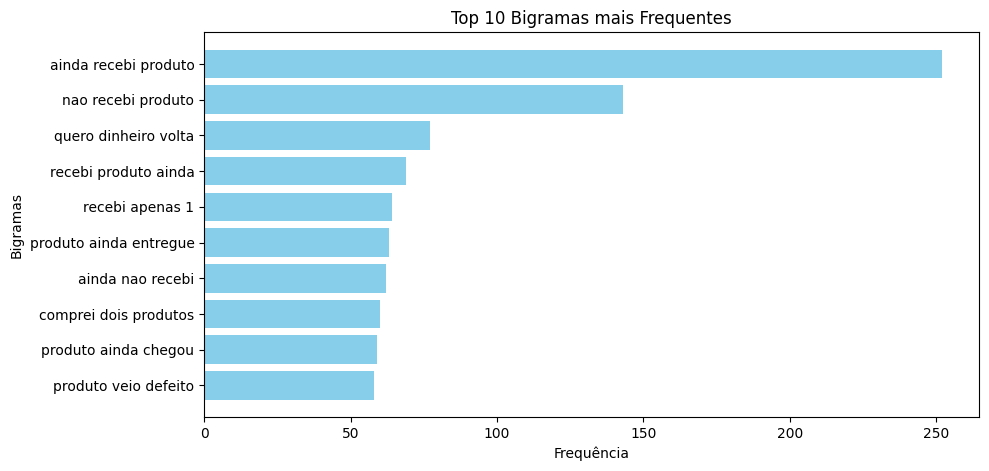

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.util import ngrams


df =  pd.DataFrame(pedidos_com_reviews[pedidos_com_reviews['avalicao pedido']<=3]['comentario review'].dropna().astype(str))

# Baixar stopwords em português
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Função de pré-processamento
def preprocess_text(text):
    # Converter para minúsculas e remover pontuação
    text = text.lower().translate(str.maketrans('', '', ',.!?'))
    # Tokenizar
    tokens = text.split()
    # Remover stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Aplicar pré-processamento
df['tokens'] = df['comentario review'].apply(preprocess_text)

# Gerar bigramas
all_tokens = [word for tokens in df['tokens'] for word in tokens]
bigrams = list(ngrams(all_tokens, 3))  # Para trigramas, use ngrams(all_tokens, 3)

# Contar frequência dos bigramas
bigram_freq = Counter(bigrams)

# Exibir os 5 bigramas mais comuns
print("Bigramas mais frequentes:", bigram_freq.most_common(20))

# Visualizar os bigramas mais frequentes com um gráfico
most_common_bigrams = bigram_freq.most_common(10)
bigram_labels = [' '.join(bigram) for bigram, freq in most_common_bigrams]
bigram_values = [freq for bigram, freq in most_common_bigrams]

plt.figure(figsize=(10, 5))
plt.barh(bigram_labels, bigram_values, color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('Bigramas')
plt.title('Top 10 Bigramas mais Frequentes')
plt.gca().invert_yaxis()
plt.show()

palavras_frequentes_por_avaliacao = pd.DataFrame(most_common_bigrams, columns=['Palavras frequentes', 'Frequência'])

#os.makedirs(caminho_metricas_dw)
nome_arquivo = "metrica_triagrama_avaliacao_menor_iguala_3.csv"
salva_metrica(palavras_frequentes_por_avaliacao,nome_arquivo)